In [190]:
# Assignment 1 Question 3
import numpy as np
import matplotlib.pyplot as plt

In [191]:
a = 0.9
hx = 0.1
ht = hx # As ht/hx must be equal to 1 as per the question
gamma = a * ht / hx
ks = np.arange(1,16)


Recall that $\gamma = \frac{a h_t}{h_x}$

**ITCS:**
$$
u_{k,\ell+1} = u_{k,\ell} - \frac{\gamma}{2} \left( u_{k+1,\ell+1} - u_{k-1,\ell+1} \right).
$$

In [192]:
# Dispersion relation: sin(omega*ht) = gamma * sin(ks*hx)
s_ITCS = np.exp(-1j * np.arcsin(gamma * np.sin(ks * hx)))
omega_ITCS = 1j * np.log(s_ITCS) / ht



Recall that $\gamma = \frac{a h_t}{h_x}$

**Crank-Nicholson:**
$$
u_{k,\ell+1} = u_{k,\ell} - \frac{\gamma}{4} \left( u_{k+1,\ell+1} - u_{k-1,\ell+1} + u_{k+1,\ell} - u_{k-1,\ell} \right).
$$


In [193]:
# Crank-Nicolson Scheme
# s_CN = (1 - i*(gamma/2)*sin(ks*hx)) / (1 + i*(gamma/2)*sin(ks*hx))
s_CN = (1 - 1j * (gamma / 2) * np.sin(ks * hx)) / (1 + 1j * (gamma / 2) * np.sin(ks * hx))
omega_CN = 1j * np.log(s_CN) / ht

Recall that $\gamma = \frac{a h_t}{h_x}$

**Lax-Wendroff:**
$$
u_{k,\ell+1} = u_{k,\ell} - \frac{\gamma}{2} \left( u_{k+1,\ell} - u_{k-1,\ell} \right)
+ \frac{\gamma^2}{2} \left( u_{k+1,\ell} - 2u_{k,\ell} + u_{k-1,\ell} \right).
$$

In [194]:
s_LW = (
    # u_{k,l}
    1 - 2*gamma**2/2

    # u_{k+1,l}
    + np.exp(1j*ks*hx) * (-gamma/2 + gamma**2/2)

    # u_{k-1,l}
    + np.exp(-1j*ks*hx) * (gamma/2 + gamma**2/2)
    )

omega_LW = 1j*np.log(s_LW)/ht

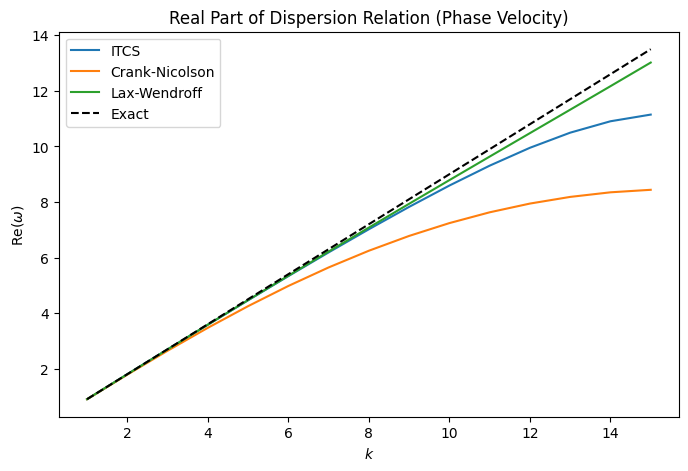

In [195]:
# Plot Real Part of ω: This graph represents the numerical dispersion relation,
# showing how the phase velocity (given by Re(ω)/k) compares with the exact value (a).
plt.figure(figsize=(8, 5))
plt.plot(ks, omega_ITCS.real, '-', label="ITCS")
plt.plot(ks, omega_CN.real, '-', label="Crank-Nicolson")
plt.plot(ks, omega_LW.real, '-', label="Lax-Wendroff")
plt.plot(ks, a * ks, 'k--', label="Exact")
plt.xlabel(r'$k$')
plt.ylabel(r'Re($\omega$)')
plt.title("Real Part of Dispersion Relation (Phase Velocity)")
plt.legend(loc="best")
plt.show()


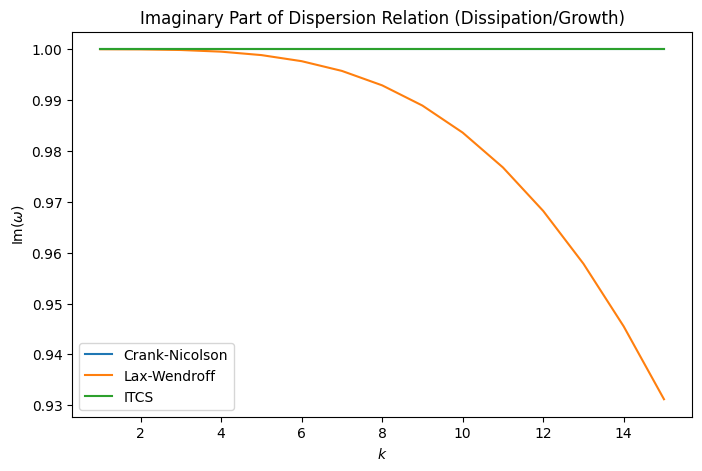

In [198]:

# Plot Imaginary Part of ω: This graph shows the imaginary component of ω,
# which equates to the amplification factor or numerical dissipation/growth rate.
# A value of zero indicates no dissipation (or growth), while nonzero values indicate
# numerical damping (if negative) or amplification (if positive).
plt.figure(figsize=(8, 5))
plt.plot(ks, np.abs(s_CN), '-', label="Crank-Nicolson")
plt.plot(ks, np.abs(s_LW), '-', label="Lax-Wendroff")
plt.plot(ks, np.abs(s_ITCS), '-', label="ITCS")
plt.xlabel(r'$k$')
plt.ylabel(r'Im($\omega$)')
plt.title("Imaginary Part of Dispersion Relation (Dissipation/Growth)")
plt.legend(loc="best")
plt.show()

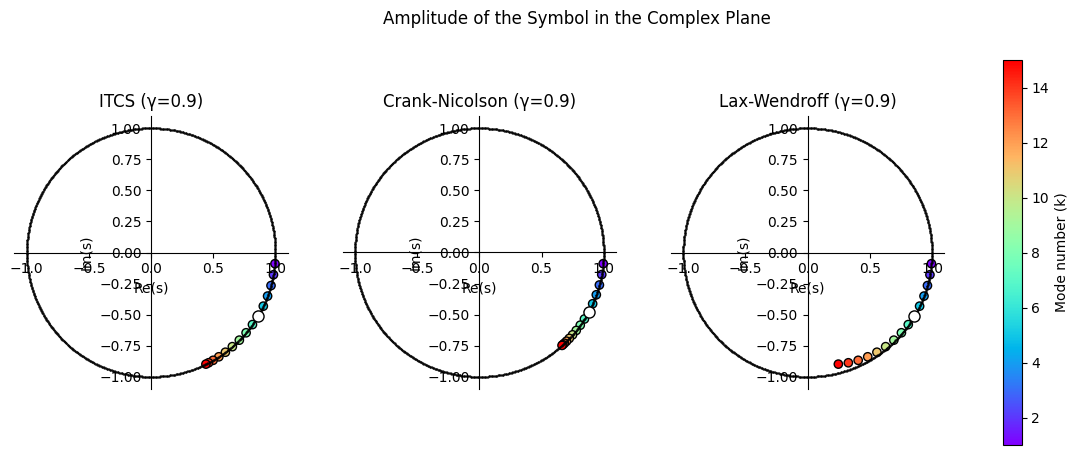

In [197]:
# Plotting the amplitude of the symbol in the complex plane for each scheme.
# The unit circle (dashed line) represents |s| = 1. If a scheme's symbol lies on the unit circle,
# it has no numerical dissipation/growth. If it lies inside, the mode is damped (dissipative).


fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Define unit circle for reference
t = np.linspace(0, 2 * np.pi, 1000)
unit_circle_x = np.cos(t)
unit_circle_y = np.sin(t)

# Choose a mode to highlight (middle mode)
kmode_index = 5

def plot_symbol(ax, s, scheme_name):
    # Plot the unit circle
    ax.plot(unit_circle_x, unit_circle_y, 'k.', ms=1)
    # Scatter all symbol values for each mode
    sc = ax.scatter(s.real, s.imag, c=ks, cmap='rainbow', edgecolors='k')
    # Highlight a particular mode
    s_mode = s[kmode_index]
    ax.plot(s_mode.real, s_mode.imag, 'ko', markerfacecolor='w', ms=8)
    ax.set_aspect('equal', adjustable='box')
    # Center the axes
    ax.spines['left'].set_position('center')
    ax.spines['bottom'].set_position('center')
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_title(f'{scheme_name} (γ={gamma})')
    ax.set_xlabel('Re(s)')
    ax.set_ylabel('Im(s)')
    return sc

sc1 = plot_symbol(axs[0], s_ITCS, 'ITCS')
sc2 = plot_symbol(axs[1], s_CN, 'Crank-Nicolson')
sc3 = plot_symbol(axs[2], s_LW, 'Lax-Wendroff')

fig.colorbar(sc3, ax=axs, label='Mode number (k)')
plt.suptitle('Amplitude of the Symbol in the Complex Plane')
plt.show()